#  World Vaccination Progress

*   This is a basic exploratory data analysis of the Covid-19 vaccination drive that’s going around the world. 




TODO - This Notebook would not have been possible without the dataset provided by @Gabriel Preda. If you haven't already, I strongly encourage you to upvote his dataset on Covid-19 world vaccination progress.

#                                  Navigation

1. Data overview

2. Data Preparation and Cleaning

3. Exploratory Analysis and Visualization

4. Asking and Answering Questions
5. Inferences and Conclusion



# Data overview




This dataset includes information about:

**Country** - this is the country for which the vaccination information is provided.

**Country ISO Code** - ISO code for the country.

**Date-** date for the data entry; for some of the dates we have only the daily 
vaccinations, for others, only the (cumulative) total.

**Total number of vaccinations **- this is the absolute number of total 
immunizations in the country.

**Total number of people vaccinated** - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people.

**Total number of people fully vaccinated** - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme.

**Daily vaccinations (raw)** - for a certain data entry, the number of vaccination for that date/country.

**Daily vaccinations** - for a certain data entry, the number of vaccination for that date/country.

**Total vaccinations per hundred** - ratio (in percent) between vaccination number and total population up to the date in the country.

**Total number of people vaccinated per hundred** - ratio (in percent) between population immunized and total population up to the date in the country.

**Total number of people fully vaccinated per hundred** - ratio (in percent) between population fully immunized and total population up to the date in the country.

**Number of vaccinations per day** - number of daily vaccination for that day and country.

**Daily vaccinations per million** - ratio (in ppm) between vaccination number and total population for the current date in the country.

**Vaccines used in the country** - total number of vaccines used in the country (up to date).

Source name - source of the information (national authority, international organization, local organization etc.).

Source website - website of the source of information.


In [34]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [35]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
from datetime import timedelta

In [36]:
from google.colab import files
  
  
uploaded = files.upload()


Saving country_vaccinations.csv to country_vaccinations (1).csv


In [37]:
import io
  
vaccine_df = pd.read_csv(io.BytesIO(uploaded['country_vaccinations.csv']))
print(vaccine_df)

           country  ...                                     source_website
0      Afghanistan  ...  https://reliefweb.int/report/afghanistan/afgha...
1      Afghanistan  ...  https://reliefweb.int/report/afghanistan/afgha...
2      Afghanistan  ...  https://reliefweb.int/report/afghanistan/afgha...
3      Afghanistan  ...  https://reliefweb.int/report/afghanistan/afgha...
4      Afghanistan  ...  https://reliefweb.int/report/afghanistan/afgha...
...            ...  ...                                                ...
14989     Zimbabwe  ...  https://twitter.com/MoHCCZim/status/1388935941...
14990     Zimbabwe  ...  https://twitter.com/MoHCCZim/status/1388935941...
14991     Zimbabwe  ...  https://twitter.com/MoHCCZim/status/1388935941...
14992     Zimbabwe  ...  https://twitter.com/MoHCCZim/status/1388935941...
14993     Zimbabwe  ...  https://twitter.com/MoHCCZim/status/1388935941...

[14994 rows x 15 columns]


The dataset has been downloaded and extracted.

In [38]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14994 entries, 0 to 14993
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              14994 non-null  object 
 1   iso_code                             14994 non-null  object 
 2   date                                 14994 non-null  object 
 3   total_vaccinations                   9011 non-null   float64
 4   people_vaccinated                    8370 non-null   float64
 5   people_fully_vaccinated              6158 non-null   float64
 6   daily_vaccinations_raw               7575 non-null   float64
 7   daily_vaccinations                   14796 non-null  float64
 8   total_vaccinations_per_hundred       9011 non-null   float64
 9   people_vaccinated_per_hundred        8370 non-null   float64
 10  people_fully_vaccinated_per_hundred  6158 non-null   float64
 11  daily_vaccinations_per_milli

In [39]:
vaccine_df.vaccines

0        Oxford/AstraZeneca
1        Oxford/AstraZeneca
2        Oxford/AstraZeneca
3        Oxford/AstraZeneca
4        Oxford/AstraZeneca
                ...        
14989     Sinopharm/Beijing
14990     Sinopharm/Beijing
14991     Sinopharm/Beijing
14992     Sinopharm/Beijing
14993     Sinopharm/Beijing
Name: vaccines, Length: 14994, dtype: object

Let us save and upload our work to Jovian before continuing.

In [40]:
project_name = "world_vaccination_progress" # change this (use lowercase letters and hyphens only)

In [41]:
!pip install jovian --upgrade -q

In [42]:
import jovian

In [43]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/tayyabkhan298/world-vaccination-progress


'https://jovian.ai/tayyabkhan298/world-vaccination-progress'

## Data Preparation and Cleaning






In this section we have done particularly few things : 

1. Filled the null values with 0 and assumed that nothing has happened* regarding that particular column.
2. Converted all the numeric values* from object type to integer type.



In [44]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14994 entries, 0 to 14993
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              14994 non-null  object 
 1   iso_code                             14994 non-null  object 
 2   date                                 14994 non-null  object 
 3   total_vaccinations                   9011 non-null   float64
 4   people_vaccinated                    8370 non-null   float64
 5   people_fully_vaccinated              6158 non-null   float64
 6   daily_vaccinations_raw               7575 non-null   float64
 7   daily_vaccinations                   14796 non-null  float64
 8   total_vaccinations_per_hundred       9011 non-null   float64
 9   people_vaccinated_per_hundred        8370 non-null   float64
 10  people_fully_vaccinated_per_hundred  6158 non-null   float64
 11  daily_vaccinations_per_milli

In [45]:
vaccine_df.drop(['source_name', 'source_website'], axis = 1, inplace = True)
vaccine_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca


In [46]:
vaccine_df.sample(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
14017,Turks and Caicos Islands,TCA,2021-01-30,NaN,NaN,NaN,NaN,312.0,NaN,NaN,NaN,8058.0,Pfizer/BioNTech
11834,San Marino,SMR,2021-03-10,3668.0,3668.0,NaN,603.0,398.0,10.81,10.81,NaN,11727.0,"Pfizer/BioNTech, Sputnik V"
1912,Botswana,BWA,2021-04-13,NaN,NaN,NaN,NaN,1746.0,NaN,NaN,NaN,742.0,Oxford/AstraZeneca
3916,Egypt,EGY,2021-04-02,NaN,NaN,NaN,NaN,19720.0,NaN,NaN,NaN,193.0,"Oxford/AstraZeneca, Sinopharm/Beijing"
2060,Bulgaria,BGR,2021-01-06,7913.0,7913.0,NaN,2465.0,472.0,0.11,0.11,NaN,68.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
12273,Serbia,SRB,2021-03-17,2077197.0,1267822.0,809375.0,24795.0,40612.0,30.53,18.63,11.89,5968.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
11544,Rwanda,RWA,2021-03-25,348926.0,348926.0,NaN,297.0,3597.0,2.69,2.69,NaN,278.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
1424,Belgium,BEL,2021-01-11,32993.0,32993.0,NaN,5580.0,4600.0,0.28,0.28,NaN,397.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
5940,Hungary,HUN,2021-03-21,2068990.0,1589601.0,479389.0,30857.0,47919.0,21.42,16.45,4.96,4960.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
10451,Pakistan,PAK,2021-03-07,NaN,NaN,NaN,NaN,13196.0,NaN,NaN,NaN,60.0,"CanSino, Sinopharm/Beijing, Sinovac, Sputnik V"


In [47]:
vaccine_df.isnull().sum(axis=0)

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     5983
people_vaccinated                      6624
people_fully_vaccinated                8836
daily_vaccinations_raw                 7419
daily_vaccinations                      198
total_vaccinations_per_hundred         5983
people_vaccinated_per_hundred          6624
people_fully_vaccinated_per_hundred    8836
daily_vaccinations_per_million          198
vaccines                                  0
dtype: int64

In [48]:
vaccine_df.fillna(value = 0, inplace = True)
vaccine_df.total_vaccinations = vaccine_df.total_vaccinations.astype(int)
vaccine_df.people_vaccinated = vaccine_df.people_vaccinated.astype(int)
vaccine_df.people_fully_vaccinated = vaccine_df.people_fully_vaccinated.astype(int)

vaccine_df.daily_vaccinations_raw = vaccine_df.daily_vaccinations_raw.astype(int)
vaccine_df.daily_vaccinations = vaccine_df.daily_vaccinations.astype(int)
vaccine_df.total_vaccinations_per_hundred = vaccine_df.total_vaccinations_per_hundred.astype(int)

vaccine_df.people_fully_vaccinated_per_hundred = vaccine_df.people_fully_vaccinated_per_hundred.astype(int)
vaccine_df.daily_vaccinations_per_million = vaccine_df.daily_vaccinations_per_million.astype(int)
vaccine_df.people_vaccinated_per_hundred = vaccine_df.people_vaccinated_per_hundred.astype(int)

In [49]:
vaccine_df.isnull().sum(axis=0)

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
dtype: int64

In [50]:
vaccine_df.shape

(14994, 13)

In [51]:
import jovian

In [52]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/tayyabkhan298/world-vaccination-progress


'https://jovian.ai/tayyabkhan298/world-vaccination-progress'

## Exploratory Analysis and Visualization




In this section, we will explore the data to get insights about it.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [53]:
!pip install chart-studio
!pip install plotly-geo
!pip install geopandas
!pip install pyshp
!pip install shapely

In [54]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, plot, init_notebook_mode, iplot
init_notebook_mode(connected=True)# initiate notebook for offline plot
cf.go_offline()

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

###                                         ***largest Vaccinated country group***
Now, let's see what countries vaccinate the most people. Here is the top-10 countries by number of vaccinations.

In [55]:
vaccinations = vaccine_df[["country", "date", "total_vaccinations", "daily_vaccinations", "vaccines"]]
vaccinations["date"] = pd.to_datetime(vaccinations["date"])
vaccinations = vaccinations.set_index(["country"])
vaccinations.head()

,date,total_vaccinations,daily_vaccinations,vaccines
country,,,,
Afghanistan,2021-02-22,0,0,Oxford/AstraZeneca
Afghanistan,2021-02-23,0,1367,Oxford/AstraZeneca
Afghanistan,2021-02-24,0,1367,Oxford/AstraZeneca
Afghanistan,2021-02-25,0,1367,Oxford/AstraZeneca
Afghanistan,2021-02-26,0,1367,Oxford/AstraZeneca


In [56]:
total_vaccinations_top10 = vaccinations.groupby(['country']).max()["total_vaccinations"]
total_vaccinations_top10 = total_vaccinations_top10.sort_values(ascending=False)[:10]

In [57]:
fig = px.bar(x=total_vaccinations_top10.index, y=total_vaccinations_top10.values,
             color=total_vaccinations_top10.index,
             labels={"x": "country", "y": "total vaccinations"},
             color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()


In [58]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/tayyabkhan298/world-vaccination-progress


'https://jovian.ai/tayyabkhan298/world-vaccination-progress'

## *Vaccines used by different countries*
Let's explore what the most commonly used vaccination scheme. Here are top-10
that are the most used.

In [59]:
vaccines=vaccinations.groupby(['vaccines','date']).sum().reset_index()
vaccines_top10 = vaccines.groupby("vaccines").max()['total_vaccinations'].reset_index()
vaccines_top10=vaccines_top10.nlargest(10,columns=['total_vaccinations'])
vaccines_top10


,vaccines,total_vaccinations
30,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",275338000
6,"Johnson&Johnson, Moderna, Pfizer/BioNTech",245591469
8,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",163347399
2,"Covaxin, Oxford/AstraZeneca",154211511
5,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",83061182
21,"Oxford/AstraZeneca, Sinovac",68134346
26,"Pfizer/BioNTech, Sinovac",45767976
3,"EpiVacCorona, Sputnik V",20070743
12,"Oxford/AstraZeneca, Pfizer/BioNTech",19519771
0,"CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, ...",18326726


In [60]:
fig=px.bar(x= vaccines_top10['vaccines'],y=vaccines_top10['total_vaccinations'],
		 labels={"x": "Vaccine Manafacturers", "y": "total vaccinations"},
		color=vaccines_top10['vaccines'],
		color_discrete_sequence=px.colors.sequential.Viridis[1:][::2])
fig.show()

In [61]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/tayyabkhan298/world-vaccination-progress


'https://jovian.ai/tayyabkhan298/world-vaccination-progress'

In [62]:
vaccinesbycountry_df = vaccine_df[['country', 'iso_code','vaccines']]
vaccinesbycountry_df.head()

,country,iso_code,vaccines
0,Afghanistan,AFG,Oxford/AstraZeneca
1,Afghanistan,AFG,Oxford/AstraZeneca
2,Afghanistan,AFG,Oxford/AstraZeneca
3,Afghanistan,AFG,Oxford/AstraZeneca
4,Afghanistan,AFG,Oxford/AstraZeneca


In [63]:
vaccinesbycountry_grouped = vaccinesbycountry_df.groupby("country").max()
vaccinesbycountry_grouped

,iso_code,vaccines
country,,
Afghanistan,AFG,Oxford/AstraZeneca
Albania,ALB,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ..."
Algeria,DZA,Sputnik V
Andorra,AND,"Oxford/AstraZeneca, Pfizer/BioNTech"
Angola,AGO,Oxford/AstraZeneca
...,...,...
Venezuela,VEN,Sputnik V
Vietnam,VNM,Oxford/AstraZeneca
Wales,OWID_WLS,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"


Lets try to plot it on the World Map. Hover and Zoom on the country to view the details of vaccines being used.

In [65]:
fig = px.choropleth(vaccinesbycountry_grouped, locations="iso_code", projection="natural earth",
                    color=vaccinesbycountry_grouped.index, hover_name="vaccines")

fig.update_layout(title="Vaccines used by each Country")

iplot(fig)

Let us save and upload our work to Jovian before continuing

In [74]:
import jovian

In [75]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/tayyabkhan298/world-vaccination-progress


'https://jovian.ai/tayyabkhan298/world-vaccination-progress'

## Asking and Answering Questions





#### Q1: Total vaccinated till date :

In [76]:
country_wise_total_vaccinated = {}

for country in vaccine_df.country.unique() : 
    vaccinated = 0

    for i in range(len(vaccine_df)) : 
        if vaccine_df.country[i] == country : 
            vaccinated += vaccine_df.daily_vaccinations[i]
    
    country_wise_total_vaccinated[country] = vaccinated 
#     made a seperate dict from the df 
    country_wise_total_vaccinated_df = pd.DataFrame.from_dict(country_wise_total_vaccinated,
                                                         orient='index',
                                                         columns = ['total_vaccinted_till_date'])
#     converted dict to df 
country_wise_total_vaccinated_df.sort_values(by = 'total_vaccinted_till_date', ascending = False, inplace = True)

country_wise_total_vaccinated_df

,total_vaccinted_till_date
China,252439788
United States,237617017
India,149554024
United Kingdom,47327237
Brazil,41599061
...,...
Somalia,0
Djibouti,0
Timor,0
Ethiopia,0


In [98]:
fig = px.bar(country_wise_total_vaccinated_df, 
             y = 'total_vaccinted_till_date',
             x = country_wise_total_vaccinated_df.index,
             color = 'total_vaccinted_till_date',
             color_discrete_sequence= px.colors.sequential.Viridis_r
            )

fig.update_layout(
    title={
            'text' : "Vaccination till date in various countries",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Countries",
    yaxis_title="Total vaccinated",)
    

fig.show()

From the plot, some interesting facts are easily noticeable:

China, from where the virus started spreading, has the highest number of vaccines.The United States, despite all protests is at second.
India, who has been supplying vaccines to the world is herself at 3rd position.
UK, where we have found a new variant strain of the virus, is right next.
Following that, we have brazil, england, Germany and others.

In [102]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/tayyabkhan298/world-vaccination-progress


'https://jovian.ai/tayyabkhan298/world-vaccination-progress'

#### Q2: Country wise daily vaccination


In [104]:
fig = px.line(vaccine_df, x = 'date', y ='daily_vaccinations', color = 'country')

fig.update_layout(
    title={
            'text' : "Daily vaccination trend",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Daily Vaccinations"
)

fig.show()



```
# From this visualization we can see that :

China started "Mass Vaccination" first,it is indeed first.
Though USA started second, in terms of daily vaccinations it stands at the second position now.
Following that we have India and brazil.
And then Germany comes in the 5th position in terms of daily vaccination



In [107]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/tayyabkhan298/world-vaccination-progress


'https://jovian.ai/tayyabkhan298/world-vaccination-progress'

#### Q3:  What country is vaccinated a larger percent from its population?




In [109]:
people_vacc_df = vaccine_df[['country', 'total_vaccinations_per_hundred']]
people_vacc_df.sample()

,country,total_vaccinations_per_hundred
7509,Kuwait,0


In [110]:
# mean of all the values of total_vaccinations_per_hundred for each country
# total vaccinations will not be a good measure as US, UK has greater value of it but their population size is also higher
people_vacc_grouped = people_vacc_df.groupby("country").mean()
people_vacc_grouped.head()

,total_vaccinations_per_hundred
country,
Afghanistan,0.000000
Albania,2.803571
Algeria,0.000000
Andorra,1.870588
Angola,0.037037


**Sorting the data based on total_vaccinations_per_hundred from higher to lower**


In [112]:
people_vacc_grouped.sort_values(by="total_vaccinations_per_hundred", ascending=False, inplace=True)
people_vacc_grouped.head()

,total_vaccinations_per_hundred
country,
Gibraltar,88.687500
Israel,76.059259
United Arab Emirates,57.847458
Bhutan,55.594595
Wales,37.176471


In [113]:
# top vaccines combination available
trace = go.Bar(x=people_vacc_grouped.index[:25], y=people_vacc_grouped["total_vaccinations_per_hundred"], 
                marker=dict(
                  color=np.arange(26)
              ))

fig = go.Figure(data=[trace])
fig.update_layout(title="Top 25 highly vaccinated countries (as per population)")
fig.update_xaxes(title="Country")
fig.update_yaxes(title="Vaccination per hundred")

iplot(fig)

In [115]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/tayyabkhan298/world-vaccination-progress


'https://jovian.ai/tayyabkhan298/world-vaccination-progress'


**We can observe that Gibraltar, Israel, etc. have a higher ratio of total vaccinations per hundred as compared to USA, UK, China**

#### Q4: Daily vaccination trend per million


In [116]:
fig = px.line(vaccine_df, x = 'date', y ='daily_vaccinations_per_million', color = 'country')

fig.update_layout(
    title={
            'text' : "Daily vaccination trend per million",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Daily Vaccinations per million"
)

fig.show()

Currently Mongolia and Bhutan has the highest number of vaccinations per million
Though on 28th March we can see a huge jump in Bhutan which is highest among all.

In [117]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/tayyabkhan298/world-vaccination-progress


'https://jovian.ai/tayyabkhan298/world-vaccination-progress'

#### Q5: Total vaccinated - India vs USA

In [121]:
india_usa = [vaccine_df[vaccine_df.country == 'United States'], vaccine_df[vaccine_df.country == 'India']]
result = pd.concat(india_usa)

fig = px.line(result, x = 'date', y ='total_vaccinations', color = 'country')

fig.update_layout(
    title={
            'text' : "Total vaccinated - India vs USA",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Total Vaccinations"
)

fig.show()

From the comparison between India and USA we can see that

USA started the vaccination drive relatively earlier.
Though India started late, the country is catching up steadily from past few days.

Let us save and upload our work to Jovian before continuing.

In [124]:
import jovian

In [126]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/tayyabkhan298/world-vaccination-progress


'https://jovian.ai/tayyabkhan298/world-vaccination-progress'

## Correlation Heatmap

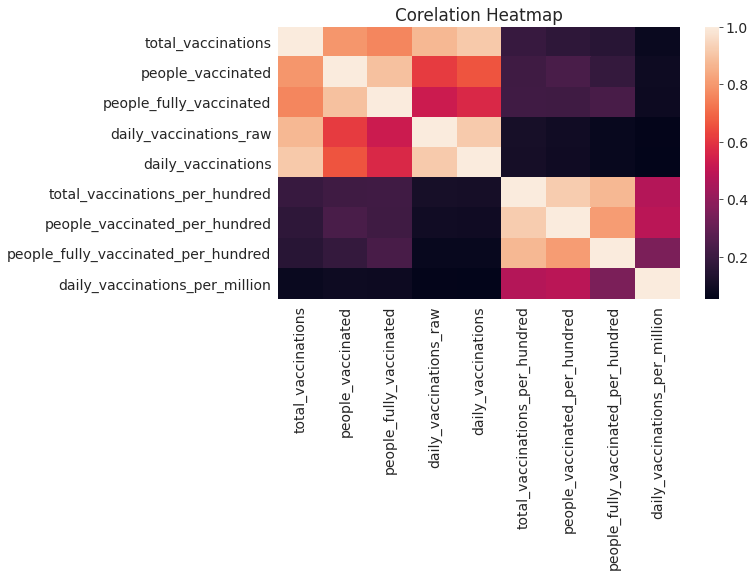

In [130]:
sns.heatmap(vaccine_df.corr())
plt.title('Corelation Heatmap')
plt.yticks(rotation = 0);


# Inferences and Conclusion

Covid-19 sent education, economics and globally on the back foot. Millions of people lost their lives, their families, their friends and loved ones and their jobs. They live under difficult conditions.

After all, there have been some positive effects of this epidemic that can be considered a bright side:

1. It has given us the opportunity to work from home and spend time with our family, which is impossible these days because of our busy schedule.
2. It has started online courses and makes learning easier and more global.
3. We have prioritized the need to make technology accessible to all.
4. Encouragement to take immediate action in the event of a disaster has helped to increase speed and innovation
5. Since all the industries were kept in a cool place, this gave the environment a chance to prosper again and we were able to see how the sky can be blue and beautiful.
6. Covid-19 vaccine has finally shown the world that ** We stand still, We are divided and we fall**

### I hope that together we can fight this successfully and get back to our normal lives again.

In [131]:
import jovian

In [132]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/tayyabkhan298/world-vaccination-progress


'https://jovian.ai/tayyabkhan298/world-vaccination-progress'

## References 



Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html

Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

 Covid-19 world vaccination progress on Kaggle by[@Gabriel Preda]
 (https://www.kaggle.com/gpreda/covid-world-vaccination-progress).


In [133]:
import jovian

In [134]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/tayyabkhan298/world-vaccination-progress


'https://jovian.ai/tayyabkhan298/world-vaccination-progress'